### (a) Download the Data

Package imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

### Get the Data Set

In [2]:
# read the arff file 
data = arff.loadarff('data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])

In [3]:
# remove the 'b' from the column
df['class'] = df['class'].str.decode('utf-8') 

In [4]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Get the class names

In [5]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

Change the categorical names to numeric 0 or 1

In [6]:
df.loc[df['class'] == 'Normal', ['class']] = 0
df.loc[df['class'] == 'Abnormal',['class']] = 1
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots of the independent variables

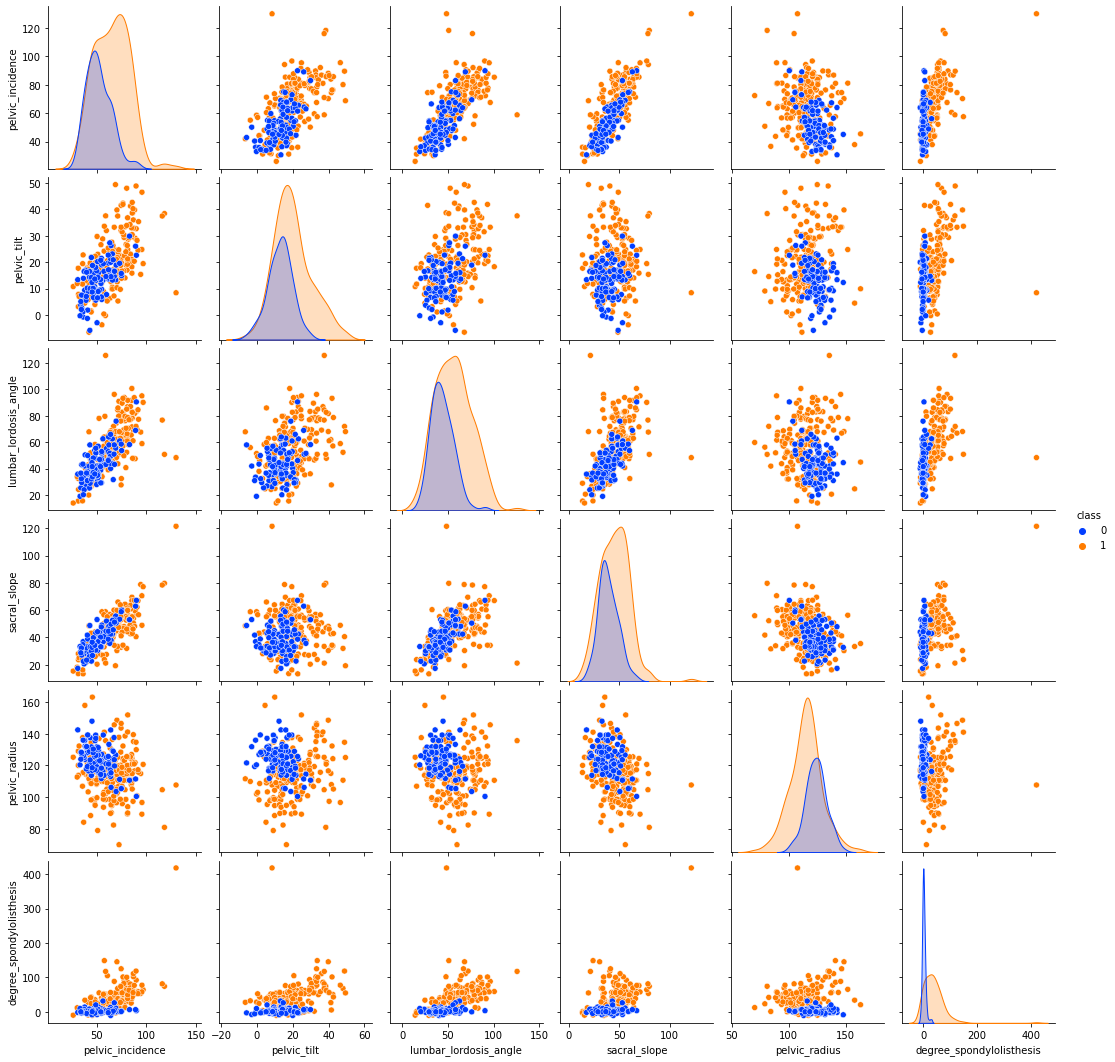

In [7]:
sns.set_palette("bright")
sns.pairplot(df, hue='class');

#### ii. Boxplots of the independent variables

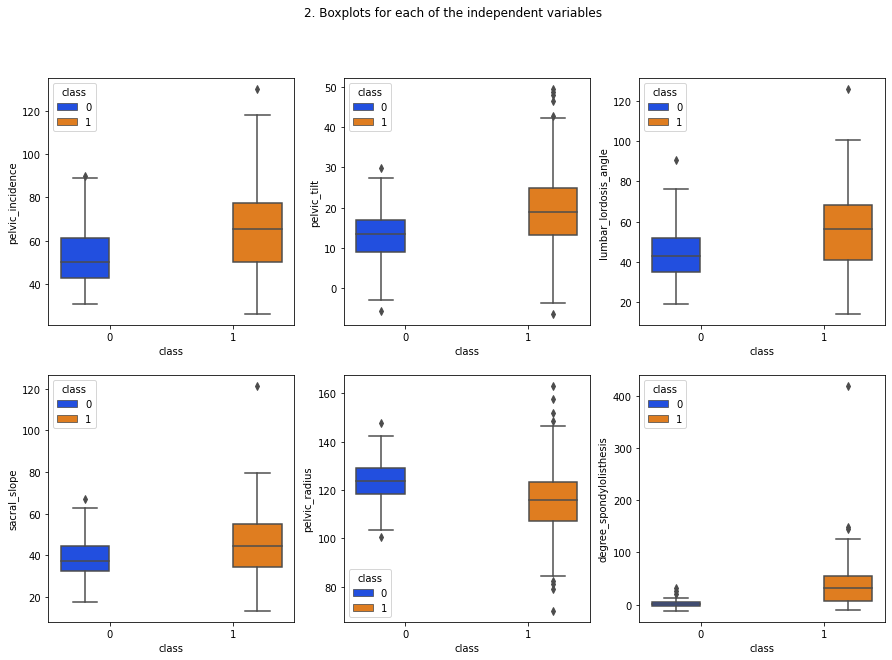

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle('2. Boxplots for each of the independent variables')

sns.boxplot(data=df, hue='class', x='class', y='pelvic_incidence',ax=axes[0, 0]);
sns.boxplot(data=df, hue='class', x='class', y='pelvic_tilt', ax=axes[0, 1]);
sns.boxplot(data=df, hue='class', x='class', y='lumbar_lordosis_angle', ax=axes[0,2]);
sns.boxplot(data=df, hue='class', x='class', y='sacral_slope', ax=axes[1,0]);
sns.boxplot(data=df, hue='class', x='class', y='pelvic_radius', ax=axes[1,1]);
sns.boxplot(data=df, hue='class', x='class', y='degree_spondylolisthesis', ax=axes[1,2]);

#### iii. Split the data set into training and test

In [9]:
# Sp;itting in separate classes of 0 and 1
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]

In [10]:
train_0 = df_0.head(70)
train_1 = df_1.head(140)

In [11]:
frames_train=[train_0, train_1]

In [12]:
# Training set
train=pd.concat(frames_train)
train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [13]:
rows_0 = df_0.iloc[:, 0].size
test_0 = df_0.tail(rows_0-70)

In [14]:
rows_1 = df_1.iloc[:, 0].size
test_1 = df_1.tail(rows_1-140)

In [15]:
frames_test=[test_0, test_1]

In [16]:
test=pd.concat(frames_test)
test

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


### (c) Classification
#### i. Euclidean Metric

In [17]:
x_train = train.drop(['class'], axis=1)
y_train = train['class']
y_train = y_train.astype('int')

x_test = test.drop(['class'], axis=1)
y_test = test['class']
y_test = y_test.astype('int')


#### ii. Test Data

In [18]:
# Finding the best k 
# p=2 for euclidian
k = 210
bestk=0
bestscore=0

while k>0:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    score=accuracy_score(predict,y_test)
    
    if score > bestscore:
        bestscore = score
        bestk = k
    k=k-1
    
print("Optimal k: "+ str(bestk))
print("Best score: " + str(bestscore))

Optimal k: 4
Best score: 0.94


In [19]:
# Calculating confusion matrix, true +ve rate, true -ve rate for k = 4
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(x_train, y_train)
predict = knn.predict(x_test)
confusion = confusion_matrix(y_test,predict)
print("Confusion matrix: ")
print(confusion)

# True positive rate(Senstivity) = TP/TP + FN
tpr = confusion[0][0]/(confusion[0][0]+confusion[1][0])
print("True Positive rate: " + str(tpr))

# True negative rate(Specificity) = TN/TN + FP
tnr = confusion[1][1]/(confusion[1][1]+confusion[0][1])
print("True Negative rate: " + str(tnr))

Confusion matrix: 
[[25  5]
 [ 1 69]]
True Positive rate: 0.9615384615384616
True Negative rate: 0.9324324324324325


In [20]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [21]:
precision_score = metrics.precision_score(y_test, predict)
print("Precision score: " + str(precision_score))
f1_score = metrics.f1_score(y_test, predict)
print("F1 score: " + str(f1_score))

Precision score: 0.9324324324324325
F1 score: 0.9583333333333333


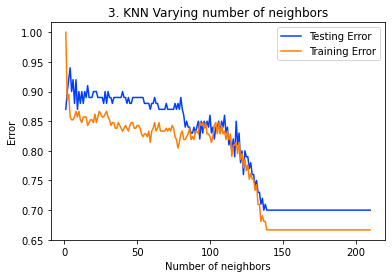

In [22]:
neighbors = np.arange(1,211)
train_error =np.empty(len(neighbors))
test_error = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k, p = 2)
    knn.fit(x_train, y_train)
    train_error[i] = (knn.score(x_train, y_train, sample_weight = None))
    test_error[i] = (knn.score(x_test, y_test, sample_weight = None))

plt.title('3. KNN Varying number of neighbors')
plt.plot(neighbors, test_error, label='Testing Error')
plt.plot(neighbors, train_error, label='Training Error')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error')
plt.show()

#### iii. Learning Curve

Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.

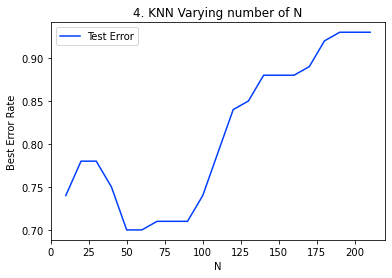

In [23]:
neighbors = np.arange(0, 21)
N = 10
test_error = np.empty(len(neighbors))
i = 0

while N <= 210:
    k2 = 1
    train2_1 = df_1.head(N - int(N / 3))
    train2_0 = df_0.head(int(N / 3))
    frames_2 = [train2_1,train2_0]
    train2 = pd.concat(frames_2)
    x_train2 = train2.drop(['class'], axis=1)
    y_train2 = train2['class']
    x_train2=x_train2.astype('int')
    y_train2=y_train2.astype('int')
    
    bestk2 = 0
    bestscore2 = 0
    while k2 < N:
        knn = KNeighborsClassifier(n_neighbors= k2)
        knn.fit(x_train2, y_train2)
        predict = knn.predict(x_test)
        score2=accuracy_score(predict,y_test)
        if score2 > bestscore2:
            bestscore2 = score2
            bestk2 = k2
        k2 = k2 + 5
    test_error[i] = bestscore2
    i = i + 1
    N = N + 10

plt.title('4. KNN Varying number of N')
plt.plot(neighbors * 10 + 10, test_error, label='Test Error')
plt.legend()
plt.xlabel('N')
plt.ylabel('Best Error Rate')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [24]:
#p=1 for manhattan distance

k = 1
bestscore_manhattan = 0
bestk_manhattan = 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    test_y_predict = knn.predict(x_test)
    score=knn.score(x_test,y_test,sample_weight=None)
    if score > bestscore_manhattan:
        bestscore_manhattan = score
        bestk_manhattan = k
    k = k + 5
print("Best Score: " + str(bestscore_manhattan))
print("Optimal k: " + str(bestk_manhattan))

Best Score: 0.92
Optimal k: 6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [25]:
bestscoredB = 0
besti = 0
i = 0.1
while i <= 1:
    knn = KNeighborsClassifier(n_neighbors= 1, metric = 'minkowski', p=pow(10,i))
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    score=accuracy_score(predict,y_test)
    if score > bestscoredB:
        bestscoredB = score
        besti = i
    i = i + 0.1
print("Best Score: " + str(bestscoredB))
print("Optimal p: " + str(besti))

Best Score: 0.89
Optimal p: 0.7


##### C. Chebyshev Distance With p -> infinity.

In [26]:
k = 1
bestscore_chebyshev = 0
bestk_chebyshev = 1
i = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'))
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    score=accuracy_score(predict,y_test)
    if score > bestscore_chebyshev:
        bestscore_chebyshev = score
        bestk_chebyshev = k
    i = i + 1
    k = k + 5
print("Best Score: " + str(bestscore_chebyshev))
print("optimal k: " + str(bestk_chebyshev))

Best Score: 0.92
optimal k: 16


#### ii. Mahalanobis Distance.

In [27]:
k = 1
bestscore_mahalanobis = 0
bestk_mahalanobis = 1
i = 0

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'mahalanobis',metric_params={'VI': x_train.cov()})
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    score=accuracy_score(predict,y_test)
    if score > bestscore_mahalanobis:
        bestscore_mahalanobis = score
        bestk_mahalanobis = k
    i = i + 1
    k = k + 5

print("Best Score: " + str(bestscore_mahalanobis))
print("Optimal k: " + str(bestk_mahalanobis))

Best Score: 0.92
Optimal k: 6


In [28]:
datad = {'DistanceName':['Euclidian','Manhattan','Chebyshev','Mahalanobis'],'Optimal K':[bestk,bestk_manhattan,bestk_chebyshev,bestk_mahalanobis],'TestErrors':[(bestscore),(bestscore_manhattan),(bestscore_chebyshev),(bestscore_mahalanobis)]}
resulttabled = pd.DataFrame(datad)
resulttabled


,DistanceName,Optimal K,TestErrors
0,Euclidian,4,0.94
1,Manhattan,6,0.92
2,Chebyshev,16,0.92
3,Mahalanobis,6,0.92


### (e) Weighted Decision

### 1. Euclidian

In [29]:
k = 1
best_ew=1
bestscore_ew=0

while k<=196:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    score=accuracy_score(predict,y_test)
    
    if score > bestscore_ew:
        bestscore_ew = score
        best_ew = k
    k=k+5
    
print("Optimal k: "+ str(best_ew))
print("Best score: " + str(bestscore_ew))

Optimal k: 6
Best score: 0.9


### 2. Mahnhattan 

In [30]:
k = 1
bestscore_mw = 0
best_mw = 1

while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, p=1, weights='distance')
    knn.fit(x_train, y_train)
    test_y_predict = knn.predict(x_test)
    score=knn.score(x_test,y_test,sample_weight=None)
    if score > bestscore_mw:
        bestscore_mw = score
        best_mw = k
    k = k + 5

print("Best Score: " + str(bestscore_mw))
print("Optimal k: " + str(best_mw))

Best Score: 0.9
Optimal k: 26


### 3. Chebyshev

In [31]:
k = 1
bestscore_cw = 0
best_cw = 1
i = 0
while k <= 196:
    knn = KNeighborsClassifier(n_neighbors= k, metric = 'chebyshev', p=float('inf'), weights='distance')
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    score=accuracy_score(predict,y_test)
    if score > bestscore_cw:
        bestscore_cw = score
        best_cw = k
    i = i + 1
    k = k + 5
print("Best Score: " + str(bestscore_cw))
print("Optimal k: " + str(best_cw))

Best Score: 0.89
Optimal k: 16


In [32]:
data_weighted = {'DistanceName':['Euclidean','Manhattan','Chebyshev'],'Optimal K':[best_ew,best_mw,best_cw],'TestErrors':[(bestscore_ew),(bestscore_mw),(bestscore_cw)]}
result_table = pd.DataFrame(data_weighted)
result_table

,DistanceName,Optimal K,TestErrors
0,Euclidean,6,0.90
1,Manhattan,26,0.90
2,Chebyshev,16,0.89


### (f) Training Error Rate

In [33]:
print("The minimum training error value:",min(train_error))

The minimum training error value: 0.6666666666666666


### References
1. https://stackoverflow.com/questions/10318884/find-out-error-rate-using-sklearn
2. https://towardsdatascience.com/generating-a-requirements-file-jupyter-notebook-385f1c315b52
